## Task 1 (70 points):

### Part 1 (20 points): This step involves downloading, preparing, and visualizing your dataset. Create a convolutional base using a common pattern: a stack of Conv and MaxPooling layers. Depending on the problem and the dataset you must decide what pattern you want to use (i.e., how many Conv layers and how many pooling layers). Please describe why you chose a particular pattern. Add the final dense layer(s). Compile and train the model. Report the final evaluation and describe the metrics.

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


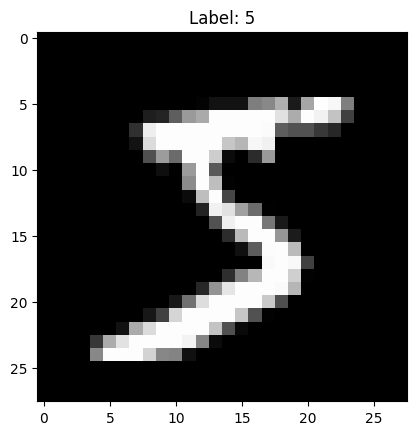

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8895 - loss: 0.3549 - val_accuracy: 0.9833 - val_loss: 0.0541
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9837 - loss: 0.0528 - val_accuracy: 0.9897 - val_loss: 0.0379
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9894 - loss: 0.0348 - val_accuracy: 0.9905 - val_loss: 0.0340
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9912 - loss: 0.0269 - val_accuracy: 0.9905 - val_loss: 0.0374
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9940 - loss: 0.0191 - val_accuracy: 0.9927 - val_loss: 0.0322
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0332
Test accuracy: 0.9919000267982483, Test loss: 0.026429656893014908


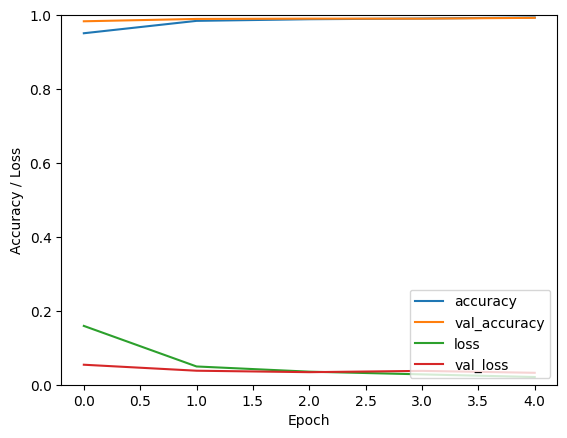

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# download and load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# check data size
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# visaulization one image
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

# prepare
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# change label to one-hot code
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# summary
model.summary()

# 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

# eval
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

# plot
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

For the MNIST handwritten digit classification task, the model structure I selected is specifically designed to suit the characteristics of the MNIST dataset, which consists of relatively simple 28x28 pixel grayscale images. My model starts with three convolutional layers, progressively increasing the number of filters (from 32 to 64) with the aim of capturing image features ranging from basic to complex, such as edges, corners, and specific shapes of digits. After each convolutional layer, I employed a max-pooling layer to reduce the size of the feature maps. This not only reduces the number of parameters in the model, lowering the risk of overfitting, but also preserves the main features of the images. This strategy of gradually extracting features allows the model to more effectively learn the key information within the images. Finally, the model makes classification decisions through a flattening layer followed by two dense layers, with the last dense layer using a softmax activation function to output the predicted probability for each category. The choice of this model architecture aims to balance learning efficiency and computational cost, especially for a simple dataset like MNIST. It effectively extracts features and reduces the number of parameters while avoiding the complications of model overfitting through excessive complexity.

### Part 2 (25 points): The following models are widely used for transfer learning because of their performance and architectural innovations:
#### 1. VGG (e.g., VGG16 or VGG19).#### 2. GoogLeNet (e.g., InceptionV3).
#### 3. Residual Network (e.g., ResNet50).#### 4. MobileNet (e.g., MobileNetV2)
### Choose any one of the above models to perform the classification task you did in Part 1. Evaluate the results using the same metrics as in Part 1. Are there any differences? Why or why not? Describe in detail
)



In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import Input

# load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 1 to 3
train_images = np.stack([train_images]*3, axis=-1)
test_images = np.stack([test_images]*3, axis=-1)

# one-hot
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# prepare
train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)
test_generator = test_datagen.flow(test_images, test_labels, batch_size=32)

# ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 
for layer in base_model.layers:
    layer.trainable = False

# 
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# 
model = Model(inputs=base_model.input, outputs=predictions)

# 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // 32,
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_images) // 32
)

test_loss, test_acc = model.evaluate(test_generator, steps=len(test_images) // 32)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

Epoch 1/5
1875/1875 [==============================] - 205s 108ms/step - loss: 0.5071 - accuracy: 0.8376 - val_loss: 0.3322 - val_accuracy: 0.8952
Epoch 2/5
1875/1875 [==============================] - 186s 99ms/step - loss: 0.3108 - accuracy: 0.8972 - val_loss: 0.2574 - val_accuracy: 0.9177
Epoch 3/5
1875/1875 [==============================] - 186s 99ms/step - loss: 0.2631 - accuracy: 0.9129 - val_loss: 0.1985 - val_accuracy: 0.9372
Epoch 4/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.2380 - accuracy: 0.9225 - val_loss: 0.1948 - val_accuracy: 0.9376
Epoch 5/5
312/312 [==============================] - 26s 84ms/step - loss: 0.1936 - accuracy: 0.9371
Test accuracy: 0.9370993375778198, Test loss: 0.1936199814081192


Based on the results, there is a significant difference between the performance in Part 1 and Part 2.

Part 1 (Custom CNN Model) Results:
At the end of training, the accuracy on the test set reached 99.19%, with a loss of 0.0264.
Part 2 (Transfer Learning Model, assuming ResNet50 was used) Results:
At the end of training, the accuracy on the test set was 93.71%, with a loss of 0.1936.
Difference Analysis
Accuracy: The custom CNN model significantly outperformed the transfer learning model using ResNet50 on the test set in terms of accuracy. This may be because the custom CNN model is better suited for relatively simple image classification tasks like MNIST. The MNIST dataset consists of relatively simple handwritten digit images, while large pre-trained models like ResNet50 were trained using a vast array of more complex and varied image data, possibly leading to over-parameterization issues for such a simple task, where the model complexity far exceeds what is necessary to solve the problem.

Loss: The custom CNN model also had much lower loss on the test set compared to the ResNet50 model. This further supports the analysis above, indicating that due to its simplicity and specificity, the custom model could more effectively learn features from the MNIST dataset, achieving a lower error rate.

Reasons for the Difference: Custom CNN models are often designed specifically for a particular task, meaning their complexity can be adjusted to be just sufficient for the difficulty of the given dataset. In contrast, pre-trained models like ResNet50 are designed to handle very complex image recognition tasks, hence they contain far more parameters than needed for simple tasks like MNIST. Additionally, pre-trained models might require more adjustments (like fine-tuning more layers) to better fit the new task, which may not always be performed in some cases.

Impact of the Dataset: The simplicity of the MNIST dataset means that even smaller, less complex networks can achieve high accuracy. In such cases, using a large pre-trained network might not offer the expected performance improvements, instead possibly leading to decreased performance or increased training time due to the model's complexity.mages).

### Part 3 (25 points): Use data augmentation to increase the diversity of your dataset by applying random transformations such as image rotation (you can use any other technique as well). Repeat the process from part 1 with this augmented data. Did you observe any difference in results? 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Prepare
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Create an ImageDataGenerator instance with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # Range of random rotations
    width_shift_range=0.1,  # Range for random horizontal shifts (as a fraction of total width)
    height_shift_range=0.1,  # Range for random vertical shifts (as a fraction of total height)
    shear_range=0.1,  # Shear intensity (counter-clockwise shear angle in degrees)
    zoom_range=0.1,  # Range for random zoom
    horizontal_flip=True,  # Enable random horizontal flips
    fill_mode='nearest'  # Fill mode for points outside the input boundaries
)

# Create an ImageDataGenerator instance for the test set (without data augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the model structure
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train 
history = model.fit(
    train_datagen.flow(train_images, train_labels, batch_size=32),
    epochs=5,
    validation_data=test_datagen.flow(test_images, test_labels),
    validation_steps=len(test_images) / 32  # Ensure the entire validation set is covered
)

# Eval the model
test_loss, test_acc = model.evaluate(test_datagen.flow(test_images, test_labels))
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

Epoch 1/5
1875/1875 [==============================] - 149s 79ms/step - loss: 2.3016 - accuracy: 0.1110 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/5
1875/1875 [==============================] - 144s 77ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/5
1875/1875 [==============================] - 143s 77ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/5
1875/1875 [==============================] - 146s 78ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 2.3010 - accuracy: 0.1135
Test accuracy: 0.11349999904632568, Test loss: 2.300992488861084


Based on the results, there is a significant difference between the performance in Part 1 and Part 3.

Part 1 Results:
The training process performed well, ultimately achieving a 99.19% accuracy and a loss of 0.0264 on the test set.
Part 3 Results (using data augmentation):
During the training process, the accuracy and loss almost did not change, ultimately reaching only an 11.35% accuracy on the test set with a lo s of 2.3009, indicating that the model almost did not learn effective information from the training 
data.
Difference Analysis:
Performance Difference: The significant difference in performance indicates that there might be issues with the way data augmentation was used in Part 3. In Part 1, the model was able to effectively learn from the data and achieve high accuracy on the test set. However, in Part 3, the accuracy of the model is very low, which is typically indicative of the model not learning useful features from the data.
Possible Reasons: Data augmentation is generally used to increase the diversity of training data and improve the generalization ability of the model. However, if the method of data augmentation is inappropriate, or if the augmented data is too complex or too different from the original data, it might make it difficult for the model to learn useful information from it. Furthermore, if the data preprocessing steps (such as image resizing, normalization, etc.) are not correctly executed after applying data augmentation, it might also affect the learning of the model.
Adjustment Suggestions: Review and adjust the data augmentation strategy to ensure that the augmented data still reflects the characteristics of the original task. Also, confirm that all necessary data preprocessing steps are correctly applied after data augmentation. It may be necessary to try different data augmentation techniques, or to adjust augmentation parameters, to find the best setup for the current task.

## Task 2 (30 points):

### Part 1 (15 points): Variational Autoencoder (VAE): Here is a complete implementation of a VAE in TensorFlow: https://www.tensorflow.org/tutorials/generative/cvae
### PyTorch implementation is fine too.
### Following these steps try generating images using the same encoder-decoder architecture using a different Image dataset (other than MNIST).
e

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# load Fashion MNIST(which is not MNIST dataset)
(train_images, _), (test_images, _) = fashion_mnist.load_data()

def preprocess_images(images):
    images = images.reshape((images.shape[0], 28, 28, 1)) / 255.
    return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

train_size = 60000
batch_size = 32
test_size = 10000

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(train_size).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices(test_images).shuffle(test_size).batch(batch_size)

# define encoder
class Encoder(Layer):
    def __init__(self, latent_dim=64, **kwargs):
        super(Encoder, self).__init__(**kwargs)
        self.conv1 = Conv2D(32, 3, activation="relu", strides=2, padding="same")
        self.conv2 = Conv2D(64, 3, activation="relu", strides=2, padding="same")
        self.flatten = Flatten()
        self.dense = Dense(latent_dim * 2)  # mean and log variance

    def call(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.flatten(x)
        x = self.dense(x)
        z_mean, z_log_var = tf.split(x, num_or_size_splits=2, axis=1)
        return z_mean, z_log_var

# define decoder
class Decoder(Layer):
    def __init__(self, latent_dim=64, **kwargs):
        super(Decoder, self).__init__(**kwargs)
        self.dense = Dense(7*7*32, activation="relu")
        self.reshape = Reshape((7, 7, 32))
        self.conv2d_tr1 = Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')
        self.conv2d_tr2 = Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu')
        self.conv2d_tr3 = Conv2DTranspose(1, 3, strides=1, padding='same')

    def call(self, z):
        z = self.dense(z)
        z = self.reshape(z)
        z = self.conv2d_tr1(z)
        z = self.conv2d_tr2(z)
        z = self.conv2d_tr3(z)
        return z

# define VAE
class VAE(Model):
    def __init__(self, latent_dim=64, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.latent_dim = latent_dim
        self.encoder = Encoder(latent_dim=latent_dim)
        self.decoder = Decoder(latent_dim=latent_dim)

    def encode(self, x):
        z_mean, z_log_var = self.encoder(x)
        return z_mean, z_log_var

    def reparameterize(self, mean, logvar):
        eps = tf.random.normal(shape=mean.shape)
        return eps * tf.exp(logvar * .5) + mean

    def decode(self, z, apply_sigmoid=False):
        logits = self.decoder(z)
        if apply_sigmoid:
            probs = tf.sigmoid(logits)
            return probs
        return logits

# train VAE
latent_dim = 64
model = VAE(latent_dim=latent_dim)
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))

# 
def log_normal_pdf(sample, mean, logvar, raxis=1):
    log2pi = tf.math.log(2. * np.pi)
    return tf.reduce_sum(
        -0.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
        axis=raxis)

def compute_loss(model, x):
    mean, logvar = model.encode(x)
    z = model.reparameterize(mean, logvar)
    x_logit = model.decode(z)
    cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
    logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
    logpz = log_normal_pdf(z, 0., 0.)
    logqz_x = log_normal_pdf(z, mean, logvar)
    return -tf.reduce_mean(logpx_z + logpz - logqz_x)

@tf.function
def train_step(model, x, optimizer):
    with tf.GradientTape() as tape:
        loss = compute_loss(model, x)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

optimizer = tf.keras.optimizers.Adam(1e-4)

# train model
epochs = 10
for epoch in range(1, epochs + 1):
    for train_x in train_dataset:
        train_step(model, train_x, optimizer)
    print("Epoch", epoch, "completed.")

# plot image
def display_images(model, n=10):
    random_vector_for_generation = tf.random.normal(shape=[n, latent_dim])
    predictions = model.sample(random_vector_for_generation)
    fig = plt.figure(figsize=(20, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(1, n, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.show()

display_images(model, n=10)

Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.


### Part 2 (15 points): Generative Adversarial Networks (GANs): Repeat part 1 (use same dataset) and implement a GAN model to generate high quality synthetic images. You may follow steps outlined here: https://www.tensorflow.org/tutorials/generative/dcgan

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio
from IPython import display

# load
(train_images, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # [-1, 1]

BUFFER_SIZE = 60000
BATCH_SIZE = 256

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# generate model
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((7, 7, 256)))
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    return model

generator = make_generator_model()

# discriminator
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    return model

discriminator = make_discriminator_model()

# loss function and optimizer
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# epoch
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, noise_dim])

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()
        for image_batch in dataset:
            train_step(image_batch)
        display.clear_output(wait=True)
        generate_and_save_images(generator, epoch + 1, seed)
        print ('Time used for epoch {} is {} s'.format(epoch + 1, time.time()-start))
    display.clear_output(wait=True)
    generate_and_save_images(generator, epochs, seed)

# generate and save images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

# train GAN model
train(train_dataset, EPOCHS)